In order to visualise multidimensional data and to make effective use of the training models that are available to us, we have to consider reducing the number of dimensions in the training data. 

PCA is one of the most popular dimensionality reduction techniques present.

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=6)

Dropping three columns since they would be representing the same data twice

In [69]:
import pandas as pd
features_nodates = pd.read_csv(r'C:\Users\aksha\PycharmProjects\FinalProject_WorkingCopy\FinalFeatures.csv')
features_nodates=features_nodates.drop(['Date','Helpful Votes','Words'],axis = 1)
features_nodates.head()

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,3,-0.235881,6.453577,1,0,3,93,3087.000000
1,5,0.915696,1.394079,3,4,3,91,300.000000
2,4,1.491485,3.666459,4,6,4,90,468.500000
3,4,5.522007,8.525083,11,20,3,91,394.272727
4,5,0.339908,1.795826,2,1,6,91,492.000000


In [70]:
X6D = pca.fit_transform(features_nodates)
print(pca.components_.T[:,0])
print(pca.explained_variance_ratio_)

[ -9.52731094e-04  -7.29627620e-05   2.30894137e-03   1.12903515e-05
   2.41271873e-04  -4.60652086e-03   6.67242861e-03   9.99963977e-01]
[  9.97174088e-01   2.32347793e-03   2.91296032e-04   1.74662935e-04
   2.43301046e-05   6.88465967e-06]


The Principal Components are stored as horizontal vectors in the variable components_ .So, .T(above cell) gives it as a column.

PCA is known to work better when the data is properly scaled. Now, since the data has a wide variety of scales, dimensionality reduction will not be accurate until the data is rescaled.

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [72]:
rescaled_data = scaler.fit_transform(features_nodates)
rescaled_data = pd.DataFrame(rescaled_data,columns=features_nodates.columns)
rescaled_data.head(20)

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,0.50,0.000484,0.315262,0.000000,0.000000,0.03,0.93,0.417478
1,1.00,0.025593,0.091377,0.015873,0.026846,0.03,0.91,0.040449
2,0.75,0.038147,0.191931,0.023810,0.040268,0.04,0.90,0.063244
3,0.75,0.126026,0.406928,0.079365,0.134228,0.03,0.91,0.053202
4,1.00,0.013038,0.109154,0.007937,0.006711,0.06,0.91,0.066423
5,0.00,0.000484,0.054710,0.000000,0.000000,0.02,0.93,0.067911
6,0.00,0.113471,0.081932,0.071429,0.093960,0.05,0.82,0.010674
7,0.75,0.013038,0.141376,0.007937,0.013423,0.05,0.89,0.091721
8,0.00,0.000484,0.048599,0.000000,0.000000,0.06,0.90,0.069670
9,0.00,0.000484,0.083599,0.000000,0.000000,0.04,0.91,0.107143


Now, we will try to perform PCA on the rescaled data and then perform KMeans clustering with k =2

kmeans_on_pca_result [[ 0.54801474  0.67085435]
 [ 0.792853    0.0852708 ]
 [ 0.56273752  0.27603592]
 ..., 
 [ 0.79927509  0.14201494]
 [ 0.79313514  0.05253293]
 [ 0.79265317  0.04692335]]


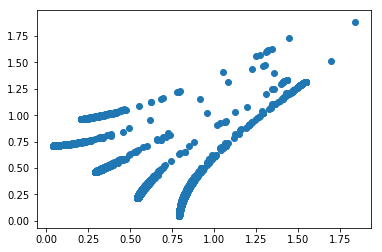

In [73]:
pca_rescaled = PCA(n_components=6)
rescaled_X6D = pca_rescaled.fit_transform(rescaled_data)
pca_rescaled.components_

# Kmeans on rescaled data

kmeans_on_pca = KMeans(n_clusters = 2)
kmeans_on_pca_result = kmeans_on_pca.fit_transform(rescaled_X6D)

print(f'kmeans_on_pca_result {kmeans_on_pca_result}')


plt.scatter(kmeans_1_result[:,0],kmeans_1_result[:,1])
plt.show()

In [74]:
pca_rescaled.explained_variance_ratio_

array([ 0.82801315,  0.12375871,  0.02625285,  0.01075357,  0.00843011,
        0.0022843 ])

The explained_variance_ratio of rescaled data makes more sense when compared to the explained_variance_ratio of the original data

Now, since the number of dimensions have been reduced to 6, we can get better results from K-means clustering

1. We first perform KMeans on just the rescaled data and observe the results.

In [75]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit_transform(rescaled_data)

array([[ 0.62577444,  0.7001056 ,  0.50730362],
       [ 0.92318108,  0.07909265,  0.31842017],
       [ 0.68910684,  0.30844409,  0.17326413],
       ..., 
       [ 0.92866198,  0.13994283,  0.3347073 ],
       [ 0.92351216,  0.03436358,  0.31665961],
       [ 0.9230744 ,  0.02515367,  0.31567222]])

In [76]:
kmeans_1 = KMeans(n_clusters = 2)
kmeans_1_result=kmeans_1.fit_transform(rescaled_data)
kmeans_1_result

array([[ 0.67088229,  0.54804901],
       [ 0.08532573,  0.79285882],
       [ 0.276047  ,  0.56274293],
       ..., 
       [ 0.14212459,  0.79929477],
       [ 0.05253293,  0.79313514],
       [ 0.04692418,  0.79265323]])

In [77]:
import matplotlib.pyplot as plt

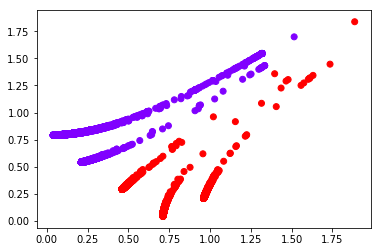

In [78]:
plt.scatter(kmeans_1_result[:,0],kmeans_1_result[:,1],c=kmeans_1.labels_, cmap='rainbow')
plt.show()

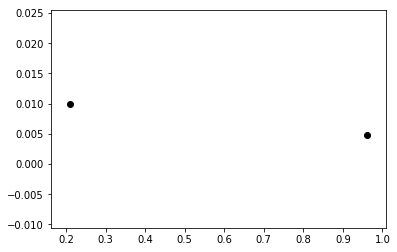

In [79]:
plt.scatter(kmeans_1.cluster_centers_[:,0],kmeans_1.cluster_centers_[:,1],color='black')
plt.show()